# Descripción

Telecom X - Análisis de Evasión de Clientes

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?

✅ Importar y manipular datos desde una API de manera eficiente.

✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.

✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.

✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.




#📌 Extracción

## Importación de librerias

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
!pip install -U kaleido

## Extracción del archivo Json

###✅ Cargar los datos directamente desde la API utilizando Python.

In [267]:
# configurar variable para traer datos de la API/archivo
url = 'https://github.com/freedox-cts/challenge-telecom-x/raw/refs/heads/main/TelecomX_Data.json'

###✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [268]:
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## Reconocer el conjunto de datos

###✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [269]:
# conociendo e indentificando columnas de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [270]:
# conociendo e indentificando tipos de datos de columnas
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [271]:
# listar columnas
columnas_api = df.columns
columnas_api

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [272]:
# cantidad de datos únicos en customerID
unicos_org = df['customerID'].nunique(dropna=False)
print('Datos únicos : ', unicos_org, '\nDatos totales: ', len(df))

Datos únicos :  7267 
Datos totales:  7267


**aparentemente no existen clientes duplicados** al comprobar coincidencia en la cantidad de datos totales con la cantidad de datos únicos

###✅ Consultar el diccionario para comprender mejor el significado de las variables.

#### Diccionario de datos

- `customerID`: 'id_cliente', número de identificación único de cada cliente
- `Churn`: 'cancelacion', si el cliente dejó o no la empresa
- `gender`: 'genero', género (masculino y femenino)
- `SeniorCitizen`: 'senior', información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: 'pareja', si el cliente tiene o no una pareja
- `Dependents`: 'dependientes', si el cliente tiene o no dependientes
- `tenure`: 'antiguedad', meses de contrato del cliente
- `PhoneService`: 'serv_telefonico', suscripción al servicio telefónico
- `MultipleLines`: 'multip_lineas', suscripción a más de una línea telefónica
- `InternetService`: 'serv_internet', suscripción a un proveedor de internet
- `OnlineSecurity`: 'seguridad_online', suscripción adicional de seguridad en línea
- `OnlineBackup`: 'respaldo_online', suscripción adicional de respaldo en línea
- `DeviceProtection`: 'proteccion_dispositivo', suscripción adicional de protección del dispositivo
- `TechSupport`: 'serv_tecnico', suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: 'tv_streaming', suscripción de televisión por cable
- `StreamingMovies`: 'peliculas_streaming', suscripción de streaming de películas
- `Contract`: 'contrato', tipo de contrato
- `PaperlessBilling`: 'boleta_electronica', si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: 'metodo_pago', forma de pago
- `Charges.Monthly`: 'pago_mensual', total de todos los servicios del cliente por mes
- `Charges.Total`: 'pago_total', total gastado por el cliente

###✅ Identificar las columnas más relevantes para el análisis de evasión.

antes que nada normalizar las columnas con diccionarios para convertirlas a columnas simples

In [273]:
# normalizar columnas que contienen mas datos en diccionarios a columnas simples
for indice, col in enumerate(columnas_api):
  if indice > 1: # las primeras dos columnas no necesitan ser normalizadas
    df_norm_col = pd.json_normalize(df[col])
    df = pd.concat([df, df_norm_col], axis=1)
    df.drop(columns=[col], inplace=True)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Remapeo del indice

In [275]:
# remapeo del indice
df.reset_index(drop=True, inplace=True)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Estandarización de datos

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

### Traducir y renombrar columnas

In [276]:
# para una mejor identificación crear un diccionario de nombres de columnas en español
columnas_esp = {
    'customerID': 'id_cliente',
    'Churn': 'cancelacion',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_65',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'antiguedad',
    'PhoneService': 'serv_telefonico',
    'MultipleLines': 'multip_lineas',
    'InternetService': 'serv_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'serv_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'contrato',
    'PaperlessBilling': 'boleta_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'pago_mensual',
    'Charges.Total': 'pago_total'
}

In [277]:
# renombrar columnas al español
df.rename(columns=columnas_esp, inplace=True)
df.columns

Index(['id_cliente', 'cancelacion', 'genero', 'mayor_65', 'pareja',
       'dependientes', 'antiguedad', 'serv_telefonico', 'multip_lineas',
       'serv_internet', 'seguridad_online', 'respaldo_online',
       'proteccion_dispositivo', 'serv_tecnico', 'tv_streaming',
       'peliculas_streaming', 'contrato', 'boleta_electronica', 'metodo_pago',
       'pago_mensual', 'pago_total'],
      dtype='object')

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   cancelacion             7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   mayor_65                7267 non-null   int64  
 4   pareja                  7267 non-null   object 
 5   dependientes            7267 non-null   object 
 6   antiguedad              7267 non-null   int64  
 7   serv_telefonico         7267 non-null   object 
 8   multip_lineas           7267 non-null   object 
 9   serv_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  serv_tecnico            7267 non-null   object 
 14  tv_streaming            7267 non-null   

## Comprobación y manejo de inconsistencias en los datos

Verificar si hay problemas en los datos que puedan afectar el análisis. Prestar atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

### Verificar datos NaN

In [279]:
# evaluar cantidad de NaN en columnas
df_filas_nan = df[df.isnull().any(axis=1)]
print(df_filas_nan)

Empty DataFrame
Columns: [id_cliente, cancelacion, genero, mayor_65, pareja, dependientes, antiguedad, serv_telefonico, multip_lineas, serv_internet, seguridad_online, respaldo_online, proteccion_dispositivo, serv_tecnico, tv_streaming, peliculas_streaming, contrato, boleta_electronica, metodo_pago, pago_mensual, pago_total]
Index: []

[0 rows x 21 columns]


In [280]:
# otro método
cant_nan = df.isnull().sum()
print(cant_nan)

id_cliente                0
cancelacion               0
genero                    0
mayor_65                  0
pareja                    0
dependientes              0
antiguedad                0
serv_telefonico           0
multip_lineas             0
serv_internet             0
seguridad_online          0
respaldo_online           0
proteccion_dispositivo    0
serv_tecnico              0
tv_streaming              0
peliculas_streaming       0
contrato                  0
boleta_electronica        0
metodo_pago               0
pago_mensual              0
pago_total                0
dtype: int64


**aparentemente no hay NaN en datos**

### Verificar datos con solo espacios

In [281]:
# evaluar cantidad de datos con espacios en columnas
print(df.astype(str).apply(lambda x: x.str.isspace()).sum())

id_cliente                 0
cancelacion                0
genero                     0
mayor_65                   0
pareja                     0
dependientes               0
antiguedad                 0
serv_telefonico            0
multip_lineas              0
serv_internet              0
seguridad_online           0
respaldo_online            0
proteccion_dispositivo     0
serv_tecnico               0
tv_streaming               0
peliculas_streaming        0
contrato                   0
boleta_electronica         0
metodo_pago                0
pago_mensual               0
pago_total                11
dtype: int64


*solo la columna 'pago_total' contiene datos con solo espacios*

corregir inconsistencias en columna 'pago_total'

In [282]:
# filas donde hay al menos una celda con solo espacios
filas_con_espacios_pt= df[df['pago_total'].astype(str).str.strip() == ''].index.tolist()
print(filas_con_espacios_pt)

[975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599]


In [283]:
# reemplazar los vacios por producto (antigüedad * pago_mensual)
for indice in filas_con_espacios_pt:
    df.loc[indice, 'pago_total'] = df.loc[indice, 'antiguedad'] * df.loc[indice, 'pago_mensual']

df.loc[filas_con_espacios_pt, ['antiguedad','pago_mensual', 'pago_total']]

,antiguedad,pago_mensual,pago_total
975,0,56.05,0.0
1775,0,20.00,0.0
1955,0,61.90,0.0
2075,0,19.70,0.0
2232,0,20.25,0.0
2308,0,25.35,0.0
2930,0,73.35,0.0
3134,0,25.75,0.0
3203,0,52.55,0.0
4169,0,80.85,0.0


### Analizar estados posibles de datos por columnas

In [284]:
# evaluar cantidad de estados posibles en columnas
unicos = df.nunique(dropna=False).sort_values()
print(unicos)

mayor_65                     2
genero                       2
dependientes                 2
pareja                       2
serv_telefonico              2
boleta_electronica           2
serv_internet                3
cancelacion                  3
proteccion_dispositivo       3
serv_tecnico                 3
seguridad_online             3
respaldo_online              3
tv_streaming                 3
peliculas_streaming          3
contrato                     3
multip_lineas                3
metodo_pago                  4
antiguedad                  73
pago_mensual              1585
pago_total                6531
id_cliente                7267
dtype: int64


*se observan 6 columnas biestados, 10 columnas triestados, 1 cuatriestado y 4 múltiples estados*



las columnas 'pago_mensual', 'pago_total' e 'id_cliente', por el momento, no necesitan ser intervenidas

In [285]:
df[['pago_mensual','pago_total','id_cliente']].sample(3)

,pago_mensual,pago_total,id_cliente
124,19.40,198.1,0208-BPQEJ
527,86.65,6224.8,0744-BIKKF
2650,106.50,5621.85,3692-JHONH


veamos los posibles estados de 'antiguedad'

In [286]:
# ver estados posibles de la columna antiguedad
df['antiguedad'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

no se observan inconsistencias

ahora miramos los posibles estados de las columnas que contienen hasta 4 estados

In [287]:
# ver los estados posibles de las columnas que contienen hasta cuatro de los mismos
for col in df.columns:
  unico = df[col].unique()
  if len(unico) <= 4:
    print(f"{col:<23} {unico}")

cancelacion             ['No' 'Yes' '']
genero                  ['Female' 'Male']
mayor_65                [0 1]
pareja                  ['Yes' 'No']
dependientes            ['Yes' 'No']
serv_telefonico         ['Yes' 'No']
multip_lineas           ['No' 'Yes' 'No phone service']
serv_internet           ['DSL' 'Fiber optic' 'No']
seguridad_online        ['No' 'Yes' 'No internet service']
respaldo_online         ['Yes' 'No' 'No internet service']
proteccion_dispositivo  ['No' 'Yes' 'No internet service']
serv_tecnico            ['Yes' 'No' 'No internet service']
tv_streaming            ['Yes' 'No' 'No internet service']
peliculas_streaming     ['No' 'Yes' 'No internet service']
contrato                ['One year' 'Month-to-month' 'Two year']
boleta_electronica      ['Yes' 'No']
metodo_pago             ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


 analizando éstas columnas tenemos que:
 - *sería posible transformar los datos de biestados a tipos booleanos o de 0 y 1* para eficiencia de análisis de datos
 - la columna `cancelacion` contiene al menos un dato vacío el cual podemos interpretar que se trata de una *no evasión* y es posible subsanarla y tratarla como biestado
 - la columna `genero` podemos tratar los datos al español
 - la columna `multip_lineas` contiene datos como "No phone service" los cuales podemos interpretar como sin multiples lineas o un "No"
 - las columnas `seguridad_online`, `respaldo_online`, `proteccion_dispositivo`, `serv_tecnico`, `tv_streaming`, `peliculas_streaming` contienen datos como "No internet service" los cuales podemos interpretar como "No" al no tener estos servicios y tratarlas como biestado



### Seleccionar y tratar columnas *Biestados*

In [288]:
# transformar datos varios de columnas seleccionadas a datos biestados de 0 y 1
# -agrupar columnas biestados a tratar
col_seleccionadas = ['cancelacion', 'pareja', 'dependientes', 'serv_telefonico', 'multip_lineas',
                     'seguridad_online', 'respaldo_online', 'proteccion_dispositivo', 'serv_tecnico',
                     'tv_streaming', 'peliculas_streaming', 'boleta_electronica']

# -reemplazar los 'Yes' a '1' todo lo demás asignamos '0' (No, espacios vacios, No phone service, No internet service)
for col in col_seleccionadas:
    df[col] = df[col].apply(lambda x: '1' if x == 'Yes' else '0')

In [289]:
# verificar únicos de columnas seleccionadas
for col in col_seleccionadas:
  unico = sorted(df[col].unique())
  print(list(map(int, unico)), col)

[0, 1] cancelacion
[0, 1] pareja
[0, 1] dependientes
[0, 1] serv_telefonico
[0, 1] multip_lineas
[0, 1] seguridad_online
[0, 1] respaldo_online
[0, 1] proteccion_dispositivo
[0, 1] serv_tecnico
[0, 1] tv_streaming
[0, 1] peliculas_streaming
[0, 1] boleta_electronica


In [290]:
# convertir a entero columnas seleccionadas y adherir 'mayor_65' a lista para verificar tipo
print('Antes:\n')
df[col_seleccionadas].info()

# aplicar conversion
for col in col_seleccionadas:
  df[col] = df[col].astype(np.int64)
col_seleccionadas.append('mayor_65')

print('\nDespués:\n')
df[col_seleccionadas].info()

Antes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cancelacion             7267 non-null   object
 1   pareja                  7267 non-null   object
 2   dependientes            7267 non-null   object
 3   serv_telefonico         7267 non-null   object
 4   multip_lineas           7267 non-null   object
 5   seguridad_online        7267 non-null   object
 6   respaldo_online         7267 non-null   object
 7   proteccion_dispositivo  7267 non-null   object
 8   serv_tecnico            7267 non-null   object
 9   tv_streaming            7267 non-null   object
 10  peliculas_streaming     7267 non-null   object
 11  boleta_electronica      7267 non-null   object
dtypes: object(12)
memory usage: 681.4+ KB

Después:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 13 column

In [291]:
# convertir a decimal columna pago_total
print('Antes:\n')
df['pago_total'].info()

#  aplicar conversion
df['pago_total'] = df['pago_total'].astype(np.float64)

print('\nDespués:\n')
df['pago_total'].info()

Antes:

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: pago_total
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB

Después:

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: pago_total
Non-Null Count  Dtype  
--------------  -----  
7267 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


### Traducir al español los datos de columnas categóricas

In [292]:
# encontrar columnas categóricas excepto 'id_cliente'
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
columnas_categoricas = columnas_categoricas[1:]
print(columnas_categoricas)

['genero', 'serv_internet', 'contrato', 'metodo_pago']


In [293]:
# ver los estados posibles de las columnas categóricas
for col in df[columnas_categoricas].columns:
  unico = df[col].unique()
  print(f"{col:<15} {unico}")

genero          ['Female' 'Male']
serv_internet   ['DSL' 'Fiber optic' 'No']
contrato        ['One year' 'Month-to-month' 'Two year']
metodo_pago     ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [294]:
# Traducir al español los datos de columnas categóricas
for col in columnas_categoricas:
  df[col] = df[col].replace({'Male':'Masculino',
                             'Female':'Femenino',
                             'Fiber optic':'Fibra optica',
                             'One year':'Anual',
                             'Month-to-month':'Mensual',
                             'Two year':'Bi-anual',
                             'Mailed check':'Cheque por correo',
                             'Electronic check':'Cheque electrónico',
                             'Credit card (automatic)':'Tarjeta de crédito (automático)',
                             'Bank transfer (automatic)':'Tranferencia bancaria (automático)'})
  print(df[col].unique())

['Femenino' 'Masculino']
['DSL' 'Fibra optica' 'No']
['Anual' 'Mensual' 'Bi-anual']
['Cheque por correo' 'Cheque electrónico'
 'Tarjeta de crédito (automático)' 'Tranferencia bancaria (automático)']


In [295]:
df[columnas_categoricas].sample(4)

,genero,serv_internet,contrato,metodo_pago
2873,Femenino,DSL,Mensual,Cheque electrónico
3546,Femenino,Fibra optica,Mensual,Cheque electrónico
1177,Masculino,No,Anual,Cheque por correo
2557,Femenino,DSL,Bi-anual,Tarjeta de crédito (automático)


### Columna de cuentas diarias

crear la columna "Cuentas_Diarias", utilizar la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [296]:
# crear la columna cuentas diarias dividiendo 'pago_mensual' por 30 y el resultado redondear a 2 decimales
df['cuentas_diarias'] = (df['pago_mensual'] / 30).round(2)

df[['pago_mensual','cuentas_diarias']].sample(3)

,pago_mensual,cuentas_diarias
2781,74.95,2.50
5839,19.60,0.65
2914,99.00,3.30


### Verificar todos los cambios

In [297]:
# evaluar cantidad de estados posibles en columnas
unicos = df.nunique(dropna=False).sort_values()
print(unicos)

cancelacion                  2
genero                       2
mayor_65                     2
pareja                       2
serv_telefonico              2
dependientes                 2
seguridad_online             2
multip_lineas                2
tv_streaming                 2
serv_tecnico                 2
respaldo_online              2
proteccion_dispositivo       2
peliculas_streaming          2
boleta_electronica           2
contrato                     3
serv_internet                3
metodo_pago                  4
antiguedad                  73
cuentas_diarias            321
pago_mensual              1585
pago_total                6531
id_cliente                7267
dtype: int64


In [298]:
# verificar todos los cambios
df.info()
df.sample(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   cancelacion             7267 non-null   int64  
 2   genero                  7267 non-null   object 
 3   mayor_65                7267 non-null   int64  
 4   pareja                  7267 non-null   int64  
 5   dependientes            7267 non-null   int64  
 6   antiguedad              7267 non-null   int64  
 7   serv_telefonico         7267 non-null   int64  
 8   multip_lineas           7267 non-null   int64  
 9   serv_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   int64  
 11  respaldo_online         7267 non-null   int64  
 12  proteccion_dispositivo  7267 non-null   int64  
 13  serv_tecnico            7267 non-null   int64  
 14  tv_streaming            7267 non-null   

,id_cliente,cancelacion,genero,mayor_65,pareja,dependientes,antiguedad,serv_telefonico,multip_lineas,serv_internet,...,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,contrato,boleta_electronica,metodo_pago,pago_mensual,pago_total,cuentas_diarias
1751,2484-DGXPZ,1,Femenino,0,1,1,31,1,0,No,...,0,0,0,0,Mensual,1,Cheque por correo,19.55,658.95,0.65
2651,3694-DELSO,0,Masculino,0,1,1,4,0,0,DSL,...,0,0,1,0,Mensual,0,Tarjeta de crédito (automático),38.55,156.10,1.28
4326,5940-NFXKV,1,Masculino,0,1,1,19,1,1,Fibra optica,...,0,0,0,1,Mensual,1,Cheque electrónico,83.65,1465.75,2.79
4008,5481-NTDOH,0,Femenino,1,1,0,67,1,1,Fibra optica,...,1,0,1,1,Anual,1,Tarjeta de crédito (automático),107.05,7142.50,3.57
272,0396-UKGAI,0,Masculino,0,0,1,23,1,0,DSL,...,0,1,0,0,Mensual,1,Tranferencia bancaria (automático),55.30,1284.20,1.84
6991,9626-VFRGG,0,Femenino,0,0,1,41,1,1,Fibra optica,...,0,0,1,0,Mensual,1,Tranferencia bancaria (automático),88.50,3645.05,2.95


### Guardar una copia en archivo

In [299]:
# guardar archivo cvs
df.to_csv('TelecomX_Data_intervenido.csv', index=False)

#📊 Carga y análisis

## Análisis Descriptivo

Realizar un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

### Estadisticas descriptivas en pagos


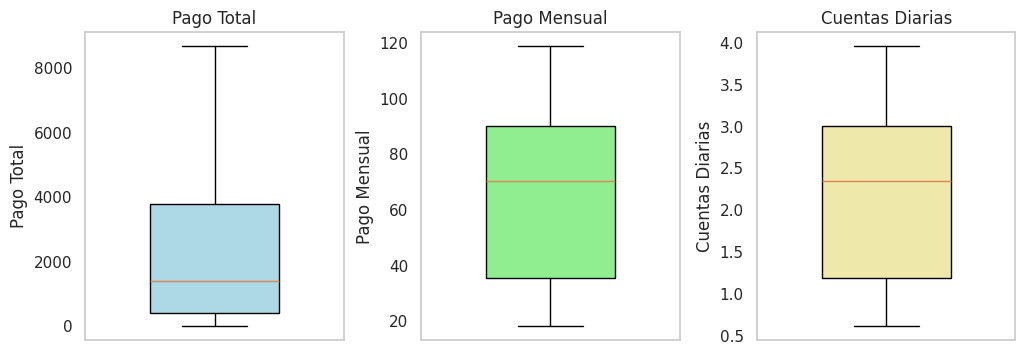

In [300]:
# seleccionar columnas de pagos
col_pagos = ['pago_total', 'pago_mensual', 'cuentas_diarias']

# crear gráficos boxplot de pagos en gráficos separados
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

colores = ['lightblue', 'lightgreen', 'palegoldenrod']
bp_titulos = ['Pago Total', 'Pago Mensual', 'Cuentas Diarias']

for i, ax in enumerate(axs):
    bp = ax.boxplot(df[col_pagos[i]], widths=0.5, patch_artist=True)

    # 'patch_artist=True' para poder rellenar las cajas con color
    for patch in bp['boxes']:
        patch.set_facecolor(colores[i])

    ax.set_title(bp_titulos[i])
    ax.set_ylabel(bp_titulos[i])
    ax.set_xticklabels([])
    ax.grid()

plt.subplots_adjust(wspace=0.3)

# guardar el gráfico como imagen PNG
plt.savefig('1-estadisticas_pagos.png', format='png', bbox_inches='tight')

# mostrar en pantalla
plt.show()

## Distribución de cancelación

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (cancelación) entre los clientes. Utilizaremos gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

### Tratar datos para analisis

In [301]:
# separo datos de cancelación y no cancelación
df_cancelacion_no = df[df['cancelacion'] == 0].copy()
df_cancelacion = df[df['cancelacion'] == 1].copy()

df_cancelacion_no.sample(3)

,id_cliente,cancelacion,genero,mayor_65,pareja,dependientes,antiguedad,serv_telefonico,multip_lineas,serv_internet,...,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,contrato,boleta_electronica,metodo_pago,pago_mensual,pago_total,cuentas_diarias
2172,3043-SUDUA,0,Femenino,0,0,0,32,1,0,No,...,0,0,0,0,Mensual,0,Tranferencia bancaria (automático),19.90,601.55,0.66
1052,1471-GIQKQ,0,Femenino,0,0,0,1,1,0,DSL,...,0,0,0,0,Mensual,0,Cheque electrónico,49.95,49.95,1.66
3087,4301-VVZKA,0,Masculino,0,1,0,16,1,1,Fibra optica,...,0,0,0,0,Mensual,1,Cheque electrónico,75.40,1189.40,2.51


In [302]:
df_cancelacion.sample(3)

,id_cliente,cancelacion,genero,mayor_65,pareja,dependientes,antiguedad,serv_telefonico,multip_lineas,serv_internet,...,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,contrato,boleta_electronica,metodo_pago,pago_mensual,pago_total,cuentas_diarias
3161,4412-YLTKF,1,Femenino,1,0,0,27,1,1,Fibra optica,...,1,0,0,0,Mensual,1,Cheque electrónico,78.05,2135.50,2.60
4150,5692-FPTAH,1,Femenino,0,0,0,1,1,0,DSL,...,0,0,0,0,Mensual,1,Cheque por correo,45.40,45.40,1.51
3937,5380-AFSSK,1,Femenino,0,0,0,5,1,1,Fibra optica,...,0,0,1,1,Mensual,1,Cheque por correo,93.90,486.85,3.13


In [303]:
# hallar frecuencia (cantidad) de cancelación y no cancelación
cant_evasion = df['cancelacion'].value_counts().reset_index()
cant_evasion

,cancelacion,count
0,0,5398
1,1,1869


In [304]:
# agrego columna 'cancelacion' y pongo nombre a la columna 'count'
cant_evasion['cancelacion'] = cant_evasion['cancelacion'].map({0: 'no canceló', 1: 'canceló'})
cant_evasion.columns = ['cancelacion', 'cantidad']
cant_evasion

,cancelacion,cantidad
0,no canceló,5398
1,canceló,1869


### Gráfico de frecuencias y porcentajes de cancelación

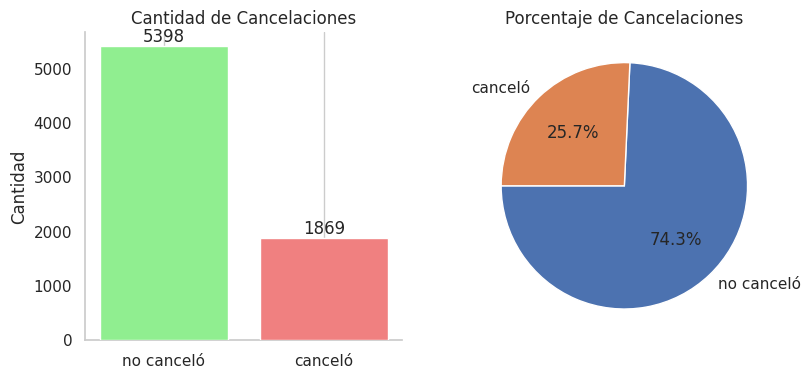

In [305]:
fig, axs = plt.subplots(1,2, figsize=(9, 4))

barras = axs[0].bar(cant_evasion['cancelacion'], cant_evasion['cantidad'], color=['lightgreen', 'lightcoral'], zorder=5)
axs[0].set_title('Cantidad de Cancelaciones')
#axs[0].set_xlabel('Cancelación')
axs[0].set_ylabel('Cantidad')
axs[0].set_facecolor('white')
axs[0].grid(axis='y')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# agrego valores encima de cada barra
for barra in barras:
    yval = barra.get_height()
    axs[0].text(barra.get_x() + barra.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom')


axs[1].pie(cant_evasion['cantidad'], labels=cant_evasion['cancelacion'], autopct='%1.1f%%', startangle=180)
axs[1].set_title('Porcentaje de Cancelaciones')

# guardar el gráfico como imagen PNG
plt.savefig('2-cancelaciones.png', format='png')

# mostrar en pantalla
plt.show()

*el grupo de cancelación es de 25.7 % del total y es el grupo de mayor interes en éste análisis*

### Gráficos de cancelaciones por género, edad, pareja y dependientes

In [306]:
col_elegidas = ['genero', 'mayor_65', 'pareja', 'dependientes']
porcent_xcol = {}
for i, col in enumerate(col_elegidas):
  cant_col = df_cancelacion[col].value_counts()

  porcent_col = (cant_col / cant_col.sum()) * 100
  porcent_xcol[col] = porcent_col

  #print(f"\n--- {col} ---")
  #print(porcent_col)
#print(porcent_xcol)

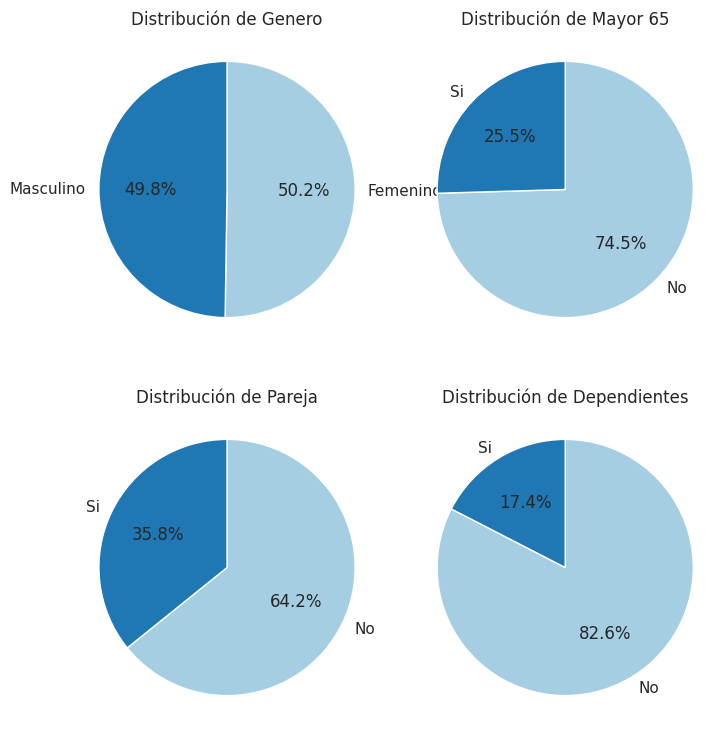

In [307]:
# Configuración para mostrar múltiples gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 9))

# 'axes' ahora es una matriz 2x2. Necesitamos aplanarla para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(col_elegidas):
    if i == 0:
      labels = porcent_xcol[col].index
    else:
      labels = porcent_xcol[col].index.map({0: 'No', 1: 'Si'})
    sizes = porcent_xcol[col].values

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, counterclock=False)
    axes[i].axis('equal') # Asegura que el círculo sea un círculo.
    axes[i].set_title(f'Distribución de {col.replace("_", " ").title()}', fontsize=12)

#plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para dar un relleno apretado.

# guardar el gráfico como imagen PNG
plt.savefig('3-cancelacion-gen-sen-par-dep.png', format='png', bbox_inches='tight')

# mostrar en pantalla
plt.show()

*de esto se desprende que la mayoria de cancelaciones son indistinta al género, menores de 65 años, sin pareja y sin dependientes*

### Gráfico de Distribución de Clientes por Tramos de Antigüedad y Cancelación

In [308]:
df.sample(3)

,id_cliente,cancelacion,genero,mayor_65,pareja,dependientes,antiguedad,serv_telefonico,multip_lineas,serv_internet,...,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,contrato,boleta_electronica,metodo_pago,pago_mensual,pago_total,cuentas_diarias
4238,5829-NVSQN,0,Femenino,0,1,0,23,1,0,DSL,...,1,1,0,1,Anual,1,Tranferencia bancaria (automático),68.75,1689.45,2.29
973,1370-AQYEM,0,Masculino,0,1,1,5,1,0,Fibra optica,...,1,0,0,1,Mensual,1,Cheque por correo,90.35,434.50,3.01
4999,6839-ITVZJ,1,Femenino,0,1,1,26,1,1,DSL,...,0,1,0,0,Mensual,1,Cheque electrónico,60.05,1616.15,2.00


In [309]:
# crear tramos de antigüedad
tramo = range(0, df['antiguedad'].max() + 10, 10)
etiqueta = [f"{i}-{i+10}" for i in tramo[:-1]]
df_tramo_antiguedad = pd.cut(df['antiguedad'], bins=tramo, labels=etiqueta, include_lowest=True)
df_tramo_antiguedad = pd.concat([df_tramo_antiguedad, df['cancelacion']], axis=1)
#df_tramo_antiguedad = df['cancelacion'].copy()
df_tramo_antiguedad.sample(3)

,antiguedad,cancelacion
6673,20-30,1
3331,30-40,0
6322,50-60,0


In [310]:
# crear tramos de antigüedad
tramo = range(0, df['antiguedad'].max() + 10, 10)
etiqueta = [f"{i}-{i+10}" for i in tramo[:-1]]
df_tramo_antiguedad = pd.cut(df['antiguedad'], bins=tramo, labels=etiqueta, include_lowest=True)
df_tramo_antiguedad = pd.concat([df_tramo_antiguedad, df['cancelacion']], axis=1)

# agrupar por tramo y cancelación
conteo = df_tramo_antiguedad.groupby(['antiguedad', 'cancelacion'], observed=False).size().reset_index(name='cantidad')
#print(conteo)

# mapear cancelación
conteo['cancelacion'] = conteo['cancelacion'].map({0: 'No cancelo', 1: 'Cancelo'})
#print(conteo['cancelacion'])

# gráfico de barras
fig = px.bar(conteo,
             x='antiguedad',
             y='cantidad',
             color='cancelacion',
             barmode='group',
             labels={'antiguedad': 'Antigüedad (meses)', 'cantidad': 'Cantidad de clientes'},
             title='Distribución de Clientes por Tramos de Antigüedad y Cancelación',
             color_discrete_map={'No cancelo': 'lightgreen', 'Cancelo': 'lightcoral'})

# a cada categoría de 'cancelacion', agregamos una línea de tendencia
for estado_cancelacion in conteo['cancelacion'].unique():
    df_filtrado = conteo[conteo['cancelacion'] == estado_cancelacion].sort_values(by='antiguedad')
    fig.add_trace(
        go.Scatter(
            x=df_filtrado['antiguedad'],
            y=df_filtrado['cantidad'],
            mode='lines', # asegurar que se vean las líneas
            name=f'Tendencia {estado_cancelacion}',
            line=dict(width=2),
            showlegend=True
        )
    )

# ajustar tamaño
fig.update_layout(width=700, height=500)

# guardar gráfico como imagen PNG
fig.write_image('4-cancelacion-antiguedad.png')

# mostrar en pantalla
fig.show()

de aqui se desprende que se produce gran cancelación en los primeros meses y luego se reducen las mismas a pasar el tiempo.

### Recuento de Cancelación por variables categóricas

In [311]:
# porcentajes de datos únicos de solo cancelación por columnas categóricas
porcent_xcol_cat = {}
for i, col in enumerate(columnas_categoricas):
  cant_col = df_cancelacion[col].value_counts()

  porcent_col = (cant_col / cant_col.sum()) * 100
  porcent_xcol_cat[col] = porcent_col

  #print(f"\n--- {col} ---")
  #print(porcent_col)
#print(porcent_xcol_cat)

In [312]:
# gráfico de Distribución Porcentual de datos únicos de Cancelación por Columnas Categórica
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=(columnas_categoricas)) # Los títulos de los subplots serán los nombres de las columnas

# agrega cada gráfico de torta a su respectiva subcelda
for i, col in enumerate(columnas_categoricas):
    row = (i // 2) + 1 # Determina la fila (1 o 2)
    col_idx = (i % 2) + 1 # Determina la columna (1 o 2)

    fig.add_trace(go.Pie(labels=porcent_xcol_cat[col].index,
                         values=porcent_xcol_cat[col].values,
                         name=col,
                         direction='clockwise',
                         rotation=180),
                  row=row, col=col_idx)

# actualiza el layout
fig.update_layout(title_text="Distribución Porcentual de datos únicos de Cancelación por Columnas Categórica", title_x=0.5)

# guardar gráfico como imagen PNG
fig.write_image('5-cancelacion-categoricas.png')

# mostrar en pantalla
fig.show()

*de esto se desprende que las cancelaciones son indistintos al género pero son mas los que tienen Fibra Optica, son mas los que tienen Contrato Mensual y son mas los que pagan con Cheque Electrónico*

### Conteo de cancelaciones por variables numéricas

In [313]:
# encontrar columnas numericas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
#print(columnas_numericas)
# no considerar columnas biestados
for elemento in col_seleccionadas:
    if elemento in columnas_numericas:
        columnas_numericas.remove(elemento)
#print(columnas_numericas)
df[columnas_numericas].describe()

,antiguedad,pago_mensual,pago_total,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157292
std,24.571773,30.129572,2268.648587,1.004407
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.425000,396.200000,1.180000
50%,29.000000,70.300000,1389.200000,2.340000
75%,55.000000,89.875000,3778.525000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


In [314]:
# porcentajes de cancelación para columnas numericas en tramos definidos
porcent_abandono_xcol_num = []
#porcent_abandono_xcol_num = {}

print('Porcentajes de cancelación para columnas numéricas en tramos definidos\n')
for col in columnas_numericas:
  # crear intervalos (bins)
  tramo = pd.qcut(df[col], q=5, duplicates='drop')

  # tabla cruzada
  tabla_cruzada = pd.crosstab(tramo, df['cancelacion'], normalize='index') * 100
  tabla_cruzada.columns = ['% no cancelo', '% cancelo']

  #print('')
  #print(tabla_cruzada)

  porcent_abandono_xcol_num.append(tabla_cruzada)
  #porcent_abandono_xcol_num[col] = tabla_cruzada
porcent_abandono_xcol_num

Porcentajes de cancelación para columnas numéricas en tramos definidos



[               % no cancelo  % cancelo
 antiguedad                            
 (-0.001, 6.0]     48.958333  51.041667
 (6.0, 20.0]       67.456446  32.543554
 (20.0, 40.0]      78.305785  21.694215
 (40.0, 60.0]      84.924623  15.075377
 (60.0, 72.0]      93.590627   6.409373,
                  % no cancelo  % cancelo
 pago_mensual                            
 (18.249, 25.05]     91.138378   8.861622
 (25.05, 58.6]       75.797503  24.202497
 (58.6, 79.05]       71.251719  28.748281
 (79.05, 94.3]       64.855571  35.144429
 (94.3, 118.75]      68.206897  31.793103,
                     % no cancelo  % cancelo
 pago_total                                 
 (-0.001, 264.6]        55.777166  44.222834
 (264.6, 936.95]        72.057811  27.942189
 (936.95, 2031.47]      79.628355  20.371645
 (2031.47, 4475.41]     77.632485  22.367515
 (4475.41, 8684.8]      86.313618  13.686382,
                  % no cancelo  % cancelo
 cuentas_diarias                         
 (0.609, 0.84]       90.

In [315]:
datos_plot = []

for col in columnas_numericas:
  # crear tramos (bins) para las columnas numéricas
  df_temp = df.copy()
  df_temp[f'{col}_bin'] = pd.qcut(df[col], q=6, duplicates='drop')

  # convertir bin a string para evitar error al exportar
  df_temp[f'{col}_bin'] = df_temp[f'{col}_bin'].astype(str)

  # calcular % de abandono agrupado por bin
  resumen = df_temp.groupby(f'{col}_bin', observed=True)['cancelacion'].mean().reset_index()
  resumen['cancelacion'] = resumen['cancelacion'] * 100
  resumen['variable'] = col

  resumen = resumen.rename(columns={f'{col}_bin': 'rango', 'cancelacion': 'porcentaje_cancelacion'})
  datos_plot.append(resumen)

datos_todos = pd.concat(datos_plot)
#datos_plot

In [316]:
fig = px.bar(datos_todos, x="rango", y='porcentaje_cancelacion', color="variable", title="Porcentaje de abandono según variables numéricas")
fig.show()

In [328]:
plotly_fig = px.bar(
    datos_todos,
    x='rango',
    y='porcentaje_cancelacion',
    color='variable',
    barmode='group',
    title='Porcentaje de cancelación según variables numéricas',
    labels={'rango': 'Rango de valor', 'porcentaje_cancelacion': '% de cancelación', 'variable': 'Variables'}
    )

plotly_fig.update_layout(
    width=750,
    height=500,
    xaxis_tickangle=-75,
    template='plotly_white',
    font=dict(family='Arial', size=12, color='black'),
    barcornerradius=5
    )

# mostrar en pantalla
plotly_fig.show()

# guardar gráfico como imagen PNG
fig.write_image('6-cancelacion-numericas.png')

*de aquí se desprende que los clientes mas antiguos tienen menos cancelaciones, el mayor costo mensual así como el diario influyen en mayor cancelaciones y el menor rango de pagos total también se asocia a una mayor cancelaciones.*

### Análisis de correlación entre variables

#### Correlaciones con variables numéricas

In [318]:
# correlación entre cancelación y pago mensual, ejemplo
correlacion = df['cancelacion'].corr(df['pago_mensual'])
print(correlacion)

0.18986571774585367


In [319]:
# matriz de correlación de columnas numéricas
col_varias = df[columnas_numericas]
col_varias = pd.concat([col_varias, df['cancelacion']], axis=1)

#matriz_corr_num.sample(3)
matriz_corr_num = col_varias.corr()

print("Matriz de correlación:\n", matriz_corr_num)

Matriz de correlación:
                  antiguedad  pago_mensual  pago_total  cuentas_diarias  \
antiguedad         1.000000      0.247982    0.825407         0.247992   
pago_mensual       0.247982      1.000000    0.652211         0.999996   
pago_total         0.825407      0.652211    1.000000         0.652225   
cuentas_diarias    0.247992      0.999996    0.652225         1.000000   
cancelacion       -0.344079      0.189866   -0.193345         0.189918   

                 cancelacion  
antiguedad         -0.344079  
pago_mensual        0.189866  
pago_total         -0.193345  
cuentas_diarias     0.189918  
cancelacion         1.000000  


#### Correlaciones con variables significativas

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   cancelacion             7267 non-null   int64  
 2   genero                  7267 non-null   object 
 3   mayor_65                7267 non-null   int64  
 4   pareja                  7267 non-null   int64  
 5   dependientes            7267 non-null   int64  
 6   antiguedad              7267 non-null   int64  
 7   serv_telefonico         7267 non-null   int64  
 8   multip_lineas           7267 non-null   int64  
 9   serv_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   int64  
 11  respaldo_online         7267 non-null   int64  
 12  proteccion_dispositivo  7267 non-null   int64  
 13  serv_tecnico            7267 non-null   int64  
 14  tv_streaming            7267 non-null   

In [321]:
# crear dicionario con los nombres de las columnas y leyendas
dic_correlacion  = {
    #'id_cliente': 'Identificador de cliente',
    'cancelacion': 'Cancelación',
    #'genero': 'Género',
    'mayor_65': 'Mayor a 65 años',
    'pareja': 'Con pareja',
    'dependientes': 'Con dependientes',
    'antiguedad': 'Antiguedad',
    'serv_telefonico': 'Servicio Telefónico',
    'multip_lineas': 'Múltiples lineas',
    #'serv_internet': 'Servicio de internet',
    'seguridad_online': 'Seguridad online',
    'respaldo_online': 'Respaldo online',
    'proteccion_dispositivo': 'Proteccion dispositivo',
    'serv_tecnico': 'Servicio técnico',
    'tv_streaming': 'TV en streaming',
    'peliculas_streaming': 'Peliculas en streaming',
    #'contrato': 'Contrato',
    'boleta_electronica': 'Boleta electrónica',
    #'metodo_pago': 'Método de pago',
    'pago_mensual': 'Pago mensual',
    'pago_total': 'Pago total',
    'cuentas_diarias': 'Cuentas diarias'
    }

# listar solo nombres de columnas a analizar
col_corr = list(dic_correlacion.keys())
print(col_corr)


['cancelacion', 'mayor_65', 'pareja', 'dependientes', 'antiguedad', 'serv_telefonico', 'multip_lineas', 'seguridad_online', 'respaldo_online', 'proteccion_dispositivo', 'serv_tecnico', 'tv_streaming', 'peliculas_streaming', 'boleta_electronica', 'pago_mensual', 'pago_total', 'cuentas_diarias']


In [322]:
# generar matriz de correlación
matriz_corr = df[col_corr].corr()
# remonbrar columnas
matriz_corr.rename(columns=dic_correlacion, index=dic_correlacion, inplace=True)
#matriz_corr

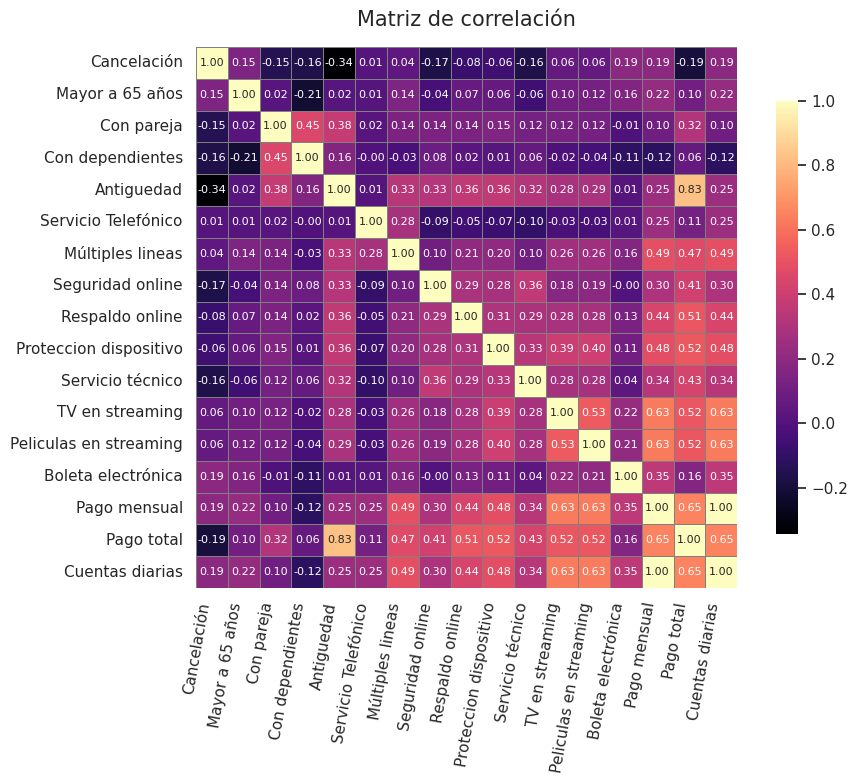

In [329]:
# gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_corr,
    annot=True,
    fmt=".2f",
    cmap="magma",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)

plt.title('Matriz de correlación', fontsize=15, pad=15)
plt.xticks(rotation=80, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# mostrar en pantalla
plt.show()

# guardar gráfico como imagen PNG
fig.write_image('7-corr_variables-significativas.png')

In [324]:
# aislar solo la correlación con 'cancelacion'
matriz_corr_cancelacion = matriz_corr.loc['Cancelación'].drop('Cancelación')
#matriz_corr_cancelacion

In [325]:
# ordenar por valor absoluto, correlación mas fuerte
corr_cancelacion_ordenada = matriz_corr_cancelacion.reindex(
    matriz_corr_cancelacion.abs().sort_values(ascending=False).index)
corr_cancelacion_ordenada = corr_cancelacion_ordenada.round(3)
#corr_cancelacion_ordenada

# crear df para gráfico y agregar Tipo correlación positiva o negativa
df_corr_graf = pd.DataFrame(corr_cancelacion_ordenada)
df_corr_graf['Correlación'] = df_corr_graf['Cancelación'].apply(lambda x: 'Directa' if x > 0 else 'Inversa')
df_corr_graf['Cancelación'] = df_corr_graf['Cancelación'].abs()
df_corr_graf = df_corr_graf.rename(columns={'Cancelación': 'Magnitud'})
df_corr_graf = df_corr_graf.reset_index()
df_corr_graf = df_corr_graf.rename(columns={'index': 'Columnas'})
df_corr_graf

,Columnas,Magnitud,Correlación
0,Antiguedad,0.344,Inversa
1,Pago total,0.193,Inversa
2,Cuentas diarias,0.190,Directa
3,Pago mensual,0.190,Directa
4,Boleta electrónica,0.187,Directa
5,Seguridad online,0.167,Inversa
6,Con dependientes,0.161,Inversa
7,Servicio técnico,0.160,Inversa
8,Con pareja,0.149,Inversa
9,Mayor a 65 años,0.147,Directa


In [326]:
# crear diccionario para leyendas
dic_corr_can_ord = dict(zip(df_corr_graf['Columnas'], df_corr_graf['Magnitud']))
dic_corr_can_ord

{'Antiguedad': 0.344,
 'Pago total': 0.193,
 'Cuentas diarias': 0.19,
 'Pago mensual': 0.19,
 'Boleta electrónica': 0.187,
 'Seguridad online': 0.167,
 'Con dependientes': 0.161,
 'Servicio técnico': 0.16,
 'Con pareja': 0.149,
 'Mayor a 65 años': 0.147,
 'Respaldo online': 0.08,
 'Proteccion dispositivo': 0.063,
 'TV en streaming': 0.062,
 'Peliculas en streaming': 0.061,
 'Múltiples lineas': 0.039,
 'Servicio Telefónico': 0.013}

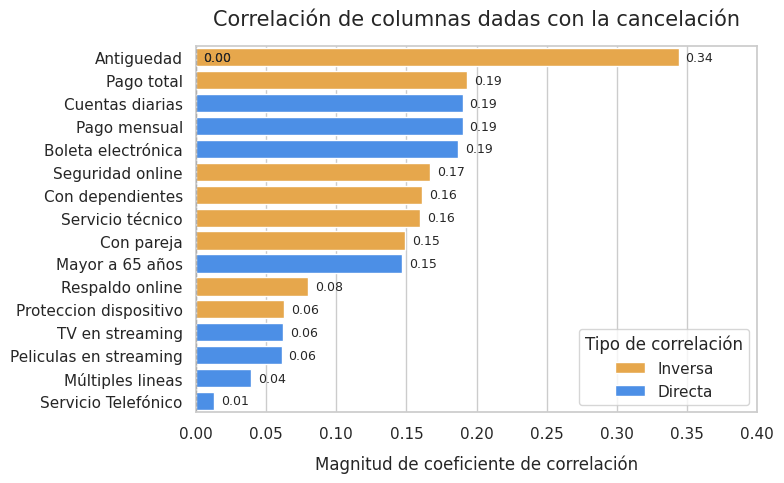

In [330]:
# crear gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
plot = sns.barplot(
    data=df_corr_graf,
    x='Magnitud',
    y='Columnas',
    hue='Correlación',
    dodge=False,
    palette={'Directa': '#338cff', 'Inversa': '#ffac33'}
)

for p in plot.patches:
    width = p.get_width() # Obtener el ancho de la barra (valor de Magnitud)
    plt.text(width + 0.005, # Posición x (un poco a la derecha de la barra)
             p.get_y() + p.get_height() / 2, # Posición y (en el centro vertical de la barra)
             f'{width:.2f}', # El texto a mostrar (formateado a 2 decimales)
             ha='left', # Alineación horizontal
             va='center', # Alineación vertical
             fontsize=9)

# Títulos y límites
plt.title('Correlación de columnas dadas con la cancelación', fontsize=15, pad=15)
plt.xlabel('Magnitud de coeficiente de correlación', labelpad = 10)
plt.ylabel('')
plt.xlim(0, 0.4)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(title='Tipo de correlación')
plt.tight_layout()


#plt.savefig("top_correlacion_cancelacion.png", dpi=300, bbox_inches='tight')

# mostrar en pantalla
plt.show()

# guardar gráfico como imagen PNG
fig.write_image('8-corr_variables-significativas-2.png')

de aqui se desprende que:
- a menor antiguedad y total de pagos tenemos mas cancelaciones;
- a menor cuenta diaria, pago mensual y pagos con boleta electrónica tenemos mas cancelaciones;
- sin pareja, dependientes, servicio tecnico o seguridad online tenemos mas cancelaciones;
-

#📄**Informe Final**

## 🔹 **Introducción:**

El presente informe detalla el análisis exploratorio de datos (EDA) realizado sobre el conjunto de datos de clientes de Telecom X prporcionado por una API. El objetivo principal es identificar los factores clave que influyen en la cancelación de servicios (Churn) por parte de los clientes. La empresa enfrenta una alta tasa de cancelación, y comprender sus causas es el primer paso para desarrollar estrategias de retención efectivas que aseguren la lealtad del cliente y la sostenibilidad del negocio.

## 🔹 **Limpieza y Tratamiento de Datos (ETL):**

Para asegurar la calidad y fiabilidad del análisis, se llevó a cabo un riguroso proceso de **Extracción, Transformación y Carga (ETL)**:

1. **Extracción**: Los datos fueron importados directamente desde una API en formato JSON y cargados en un DataFrame de Pandas para su manipulación.
2. **Transformación y Limpieza**:
- **Normalización**: Las columnas con datos anidados (en diccionarios) fueron desglosadas en columnas individuales (pago_mensual, pago_total, etc.).
- **Estandarización**: Se renombraron todas las columnas a español para una mejor comprensión y se tradujeron los valores categóricos (ej. 'Male' por 'Masculino').
- **Manejo de Inconsistencias**: Se detectaron 11 registros en la columna pago_total que contenían solo espacios en blanco. Estos correspondían a clientes nuevos con 0 meses de antigüedad. Se corrigieron imputando el valor del pago_mensual en el pago_total.
- **Conversión de Datos**: Las columnas con respuestas binarias (ej. Sí/No) y aquellas con categorías como "No phone service" o "No internet service" fueron transformadas a un formato numérico (1 para 'Sí' y 0 para 'No' o ausencia de servicio). Esto facilita el análisis cuantitativo y la modelización.
- **Tipos de Datos**: Se ajustaron los tipos de datos de las columnas para optimizar el uso de memoria y la precisión de los cálculos (ej. pago_total a float64).
3. **Ingeniería de Características (Feature Engineering)**: Se creó la columna cuentas_diarias a partir del pago_mensual para ofrecer una perspectiva de costo a corto plazo.

Finalmente, *se guardó una copia del dataset procesado* en un archivo CSV (TelecomX_Data_intervenido.csv) para su futura utilización.

## 🔹 **Análisis Exploratorio de Datos (EDA):**

El análisis visual de los datos en gráficos reveló patrones significativos sobre el comportamiento de los clientes que cancelan el servicio.

**Perfil General de Cancelación**
- *La tasa de cancelación (Churn)* general es del 25.7%, lo que representa una cuarta parte de la cartera de clientes analizada.

IMG - 2
<img src="https://github.com/freedox-cts/challenge-telecom-x/blob/main/imagenes/1-estadisticas_pagos.png?raw=true" width="600">

- El *perfil demográfico del cliente* que cancela muestra que no hay una diferencia significativa por género. Sin embargo, la evasión es mayor en clientes jóvenes (menores de 65 años), sin pareja y sin dependientes.

IMG - 3
<img src="https://github.com/freedox-cts/challenge-telecom-x/blob/main/imagenes/3-cancelacion-gen-sen-par-dep.png?raw=true" width="600">

**Factores Clave en la Cancelación**
1. **Antigüedad del Cliente**: Este es el factor más determinante. La tasa de cancelación es extremadamente alta en los primeros 10 meses de servicio y disminuye drásticamente a medida que el cliente permanece más tiempo en la compañía. Los clientes con más de 50 meses son los más leales.

IMG - 4
<img src="https://github.com/freedox-cts/challenge-telecom-x/blob/main/imagenes/4-cancelacion-antiguedad.png?raw=true" width="600">

2. **Tipo de Contrato**: Existe una relación directa y contundente entre el tipo de contrato y la cancelación. Los clientes con contratos mensuales ("Month-to-month") representan la gran mayoría de las cancelaciones (88.5%). Los contratos anuales o bianuales actúan como un fuerte mecanismo de retención.

IMG - 5
<img src="https://github.com/freedox-cts/challenge-telecom-x/blob/main/imagenes/5-cancelacion-categoricas.png?raw=true" width="600">

3. **Servicios y Pagos**:
- **Servicio de Internet**: Los clientes con Fibra Óptica tienden a cancelar más que aquellos con DSL.
- **Método de Pago**: El pago con Cheque electrónico está asociado a una tasa de cancelación considerablemente mayor que otros métodos como la transferencia bancaria o tarjeta de crédito automáticas.
- **Cargos Mensuales**: A mayor pago mensual, mayor es la propensión a cancelar. Los clientes que pagan más de $70 mensuales muestran las tasas de cancelación más altas.

**Correlación de Variables**.
El análisis de correlación confirmó los hallazgos del EDA:

IMG - 7
<img src="https://github.com/freedox-cts/challenge-telecom-x/blob/main/imagenes/7-corr_variables-significativas.png?raw=true" width="600">

- **Correlación Inversa** (reduce la cancelación): La antigüedad (-0.35) es la variable con la correlación negativa más fuerte. A más antigüedad, menor cancelación. Le siguen tener contratos a largo plazo, servicios de soporte técnico (-0.26) y seguridad online (-0.29).
- **Correlación Directa** (aumenta la cancelación): El pago mensual (+0.18) y el uso de boleta electrónica (+0.18) son las variables con la correlación positiva más relevante, indicando que a medida que estos valores aumentan, también lo hace la probabilidad de cancelación.

IMG - 8
<img src="https://github.com/freedox-cts/challenge-telecom-x/blob/main/imagenes/8-corr_variables-significativas-2.png?raw=true" width="600">

## 🔹 **Conclusiones e Insights:**

*El análisis permite presentar un perfil claro del cliente propenso a la cancelación y los factores que impulsan su decisión*:

El **"Cliente en Riesgo"**: Es un cliente nuevo (menos de 1 año), con un contrato mensual, que paga un cargo mensual elevado (generalmente por servicios de Fibra Óptica) y utiliza cheque electrónico como método de pago. Además, es menos probable que tenga servicios adicionales de protección como soporte técnico o seguridad online.

La **"Zona de Peligro"**: Los primeros meses de servicio son críticos. La estrategia de la empresa debe enfocarse intensamente en la experiencia del cliente durante el primer año para superar esta barrera inicial.

El **"Ancla de Retención"**: Los contratos a largo plazo (anuales o bianuales) y la contratación de servicios de valor agregado (soporte, seguridad, respaldo) son los elementos que más contribuyen a la lealtad del cliente.

## 🔹 Recomendaciones:

*Basado en los insights obtenidos, se proponen las siguientes acciones para reducir la tasa de cancelación:*

**1. Programa de Fidelización para Clientes Nuevos**:
- Implementar una campaña de "Onboarding" durante los primeros 3 a 6 meses. Esto podría incluir descuentos progresivos, ofertas exclusivas o seguimiento personalizado para asegurar una experiencia positiva inicial.

**2. Incentivar Contratos a Largo Plazo**:
- Crear ofertas agresivas para que los clientes con contratos mensuales migren a planes anuales o bianuales, destacando el ahorro y la estabilidad del servicio.

**3. Revisar la Oferta de Fibra Óptica**:
- Investigar por qué los clientes de Fibra Óptica cancelan más. ¿Es un problema de precio, de calidad del servicio o de expectativas no cumplidas? Se podría realizar una encuesta de satisfacción enfocada en este segmento.

**4. Promocionar Servicios de Valor Agregado**:
- Ofrecer paquetes que incluyan Soporte Técnico, Seguridad Online y Respaldo Online a un precio atractivo, especialmente al momento de la contratación. Estos servicios actúan como un factor de "enganche" que reduce la cancelación.

**5. Optimizar Métodos de Pago**:
- Fomentar la adhesión a pagos automáticos (tarjeta de crédito o transferencia bancaria) ofreciendo pequeños descuentos o beneficios, ya que estos métodos se asocian a una menor tasa de cancelación en comparación con el cheque electrónico.
